In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]

In [7]:
Y = dataset[:,10]

In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [9]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [12]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [13]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [16]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.6948 - accuracy: 0.5205 - val_loss: 0.6951 - val_accuracy: 0.4749
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5225 - val_loss: 0.6806 - val_accuracy: 0.4886
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.5616 - val_loss: 0.6701 - val_accuracy: 0.6575
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6641 - accuracy: 0.6898 - val_loss: 0.6617 - val_accuracy: 0.7397
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.7407 - val_loss: 0.6543 - val_accuracy: 0.7397
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6504 - accuracy: 0.7554 - val_loss: 0.6471 - val_accuracy: 0.7626
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6438 - accuracy: 0.7573 - val_loss: 0.6395 - val_accuracy: 0.7626
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3224 - accuracy: 0.8699 - val_loss: 0.3522 - val_accuracy: 0.8539
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3207 - accuracy: 0.8718 - val_loss: 0.3512 - val_accuracy: 0.8539
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8679 - val_loss: 0.3519 - val_accuracy: 0.8630
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8718 - val_loss: 0.3441 - val_accuracy: 0.8539
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8748 - val_loss: 0.3462 - val_accuracy: 0.8584
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8748 - val_loss: 0.3411 - val_accuracy: 0.8539
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8757 - val_loss: 0.3413 - val_accuracy: 0.8493
Epoch 

In [18]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.9041


0.9041095972061157

In [19]:
import matplotlib.pyplot as plt

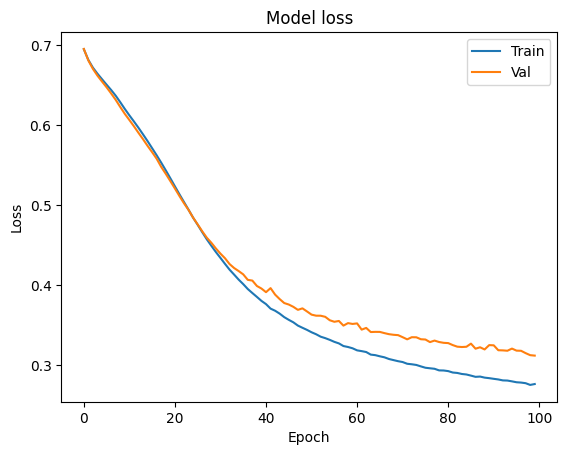

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

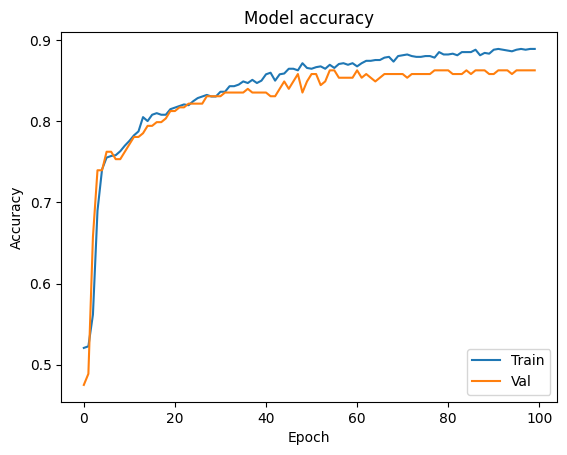

In [23]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [25]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

Load Dataset

In [26]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [27]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [28]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


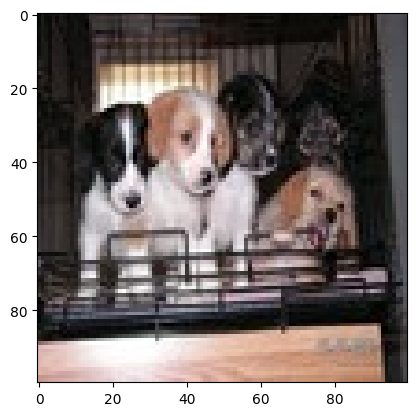

In [29]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [30]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [31]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 13s 368ms/step - loss: 0.7637 - accuracy: 0.5105
Epoch 2/5
32/32 [==============================] - 21s 669ms/step - loss: 0.6787 - accuracy: 0.5880
Epoch 3/5
32/32 [==============================] - 19s 602ms/step - loss: 0.6176 - accuracy: 0.6625
Epoch 4/5
32/32 [==============================] - 20s 631ms/step - loss: 0.5669 - accuracy: 0.7085
Epoch 5/5
32/32 [==============================] - 19s 593ms/step - loss: 0.4939 - accuracy: 0.7630


In [32]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 72ms/step - loss: 0.6027 - accuracy: 0.6800


[0.6027236580848694, 0.6800000071525574]

# Making predictions

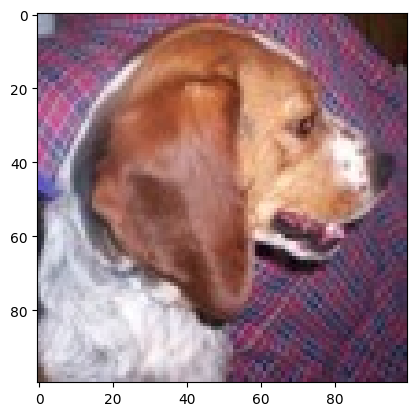

1/1 [==============================] - 2s 2s/step
[[False]]
Our model says it is a : dog


In [33]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5
print(y_pred)
if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)